<h1>Predictive Modelling for Agriculture</h1>
<b>Objective:</b> Use supervised learning models to recommend the most suitable crop based on soil measurements — nitrogen, phosphorus, potassium, and pH — using multi-class classification.

This project is divide into two parts,
- Build a multi-class classification model to identify the single most important feature for predictive performance
- Build a multi-class classification model to predict the type of crops


<h3>1. Importing Libraries</h3>

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import metrics

<h3>2. Data Loading and Inspection</h3>

In [65]:
# Load the dataset
crops = pd.read_csv("data\soil_measures.csv")
# View sample data
crops.head()
# Check for null values or data issues
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


<h3>3. Exploratory Data Analysis</h3>

Text(0.5, 1.02, 'Soil Features vs. Crop Types')

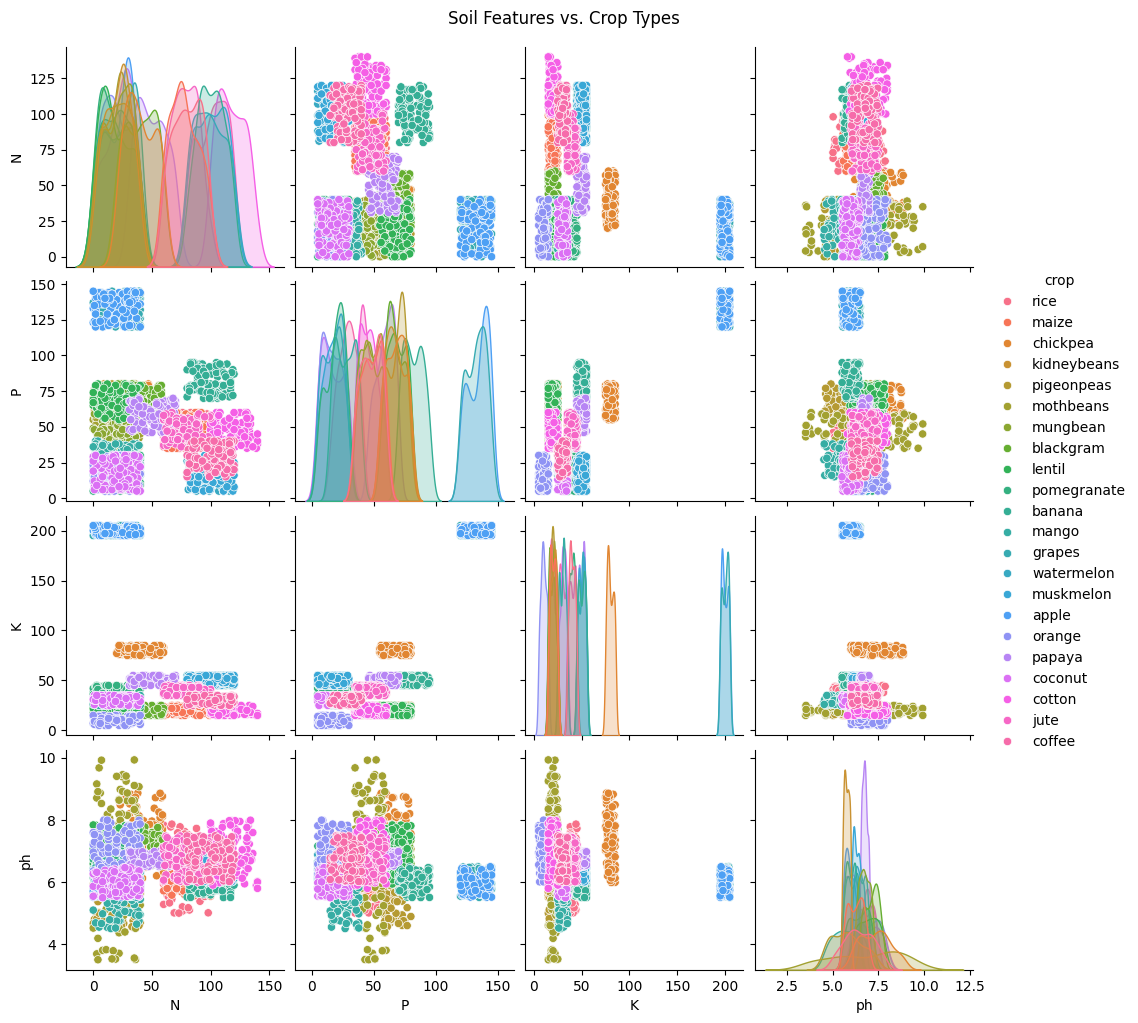

In [66]:
# Pairplot to visualize feature relationships by crop types
## Visualize how soil features vary across different crop types. This helps spot separability patterns.

import seaborn as sns
sns.pairplot(crops, hue='crop')
plt.suptitle("Soil Features vs. Crop Types", y=1.02)

<h3>4. Feature and Target Separation </h3>

In [67]:
# Separate features (X) and target variable (y)
X = crops.drop("crop",axis=1)
y = crops["crop"]

<h3>5. Train-Test-Split</h3>

In [68]:
# Split the data into training and test sets (70/30)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
best_predictive_feature = {}
feature_performance = {}

<h3>6. Modelling: Logistic Regression with Pipeline</h3>

In [69]:
# Calculate the most useful single feature (soil component) for predicting the crop

for feature in ["N","P","K","ph"]:
    
    # Build Pipeline with StandardScaler() and LogisticRegression()
    scaler = StandardScaler()
    logreg = LogisticRegression(solver='lbfgs', max_iter=200) #multi_class = "multinomial"
    logreg_pipe = make_pipeline(scaler, logreg)

    # Fit the model
    logreg_pipe.fit(X_train[[feature]],y_train)

    #Predict and evaluate
    y_pred = logreg_pipe.predict(X_test[[feature]])
    f1_score = metrics.f1_score(y_test,y_pred,average="weighted")

    # Store f1-score for each soil component in feature performance
    feature_performance[feature] = f1_score
    print(f"F1-score for {feature}: {f1_score}")

# Find out the soil component with highest f1-score and store it in best_predictive_feature
max_value = max(feature_performance.values())
for key,value in feature_performance.items():
    if value == max_value:
        best_predictive_feature[key]=value

print(f"\nMost useful soil component for predicting the crop: {list(best_predictive_feature.keys())[0]}")

F1-score for N: 0.10075454263521601
F1-score for P: 0.09403386246033325
F1-score for K: 0.1356131859628798
F1-score for ph: 0.06753914818521418

Most useful soil component for predicting the crop: K


In [ ]:
# Scores before Scaling the data
F1-score for N: 0.08660271714032519
F1-score for P: 0.13652192651343945
F1-score for K: 0.2316316107819423
F1-score for ph: 0.02956347440414663
{'K': 0.2316316107819423}

<h3>7. Modelling: Random Forest Classifier with Pipeline</h3>

In [70]:
# Random Forest captures the nonlinearity of the data, reduces overfitting and handles multi-class classification well.

## Build and train pipeline with Random Forest
steps = [('scaler',StandardScaler()), ('randforestclass', RandomForestClassifier(random_state = 42))]
rf_pipe = Pipeline(steps)
rf_pipe.fit(X_train, y_train)
y_pred_all = rf_pipe.predict(X_test)
print(f"Best crop to produce based on the soil components presented in the test data: {y_pred_all[0]}\n")

#Evaluation of the model
accuracy = metrics.accuracy_score(y_test, y_pred_all)
f1_all = metrics.f1_score(y_test, y_pred_all, average = 'weighted')

compare_metrics = {}
compare_metrics["Random Forest"] = [accuracy, f1_all]

# A visualization of the confusion matrix have been added in the below cell
# conf_matrix = metrics.confusion_matrix(y_test, y_pred_all) 

print(f"Final Model Performance:")
print(f"  - Accuracy: {accuracy:.3f}")
print(f"  - Weighted F1-score: {f1_all:.3f}\n")

Best crop to produce based on the soil components presented in the test data: muskmelon

Final Model Performance:
  - Accuracy: 0.800
  - Weighted F1-score: 0.798



In [71]:
# Check how well the model performs per class
class_report = metrics.classification_report(y_test, y_pred_all)
print(f"Random Forest Performance:\n{class_report}")

Random Forest Performance:
              precision    recall  f1-score   support

       apple       0.65      0.59      0.62        34
      banana       1.00      1.00      1.00        26
   blackgram       0.83      0.73      0.78        26
    chickpea       1.00      1.00      1.00        34
     coconut       0.74      0.79      0.76        33
      coffee       0.91      0.97      0.94        30
      cotton       0.93      1.00      0.97        28
      grapes       0.46      0.52      0.49        23
        jute       0.63      0.65      0.64        34
 kidneybeans       0.86      0.83      0.85        36
      lentil       0.47      0.77      0.59        22
       maize       1.00      0.96      0.98        26
       mango       0.77      0.75      0.76        32
   mothbeans       0.80      0.82      0.81        34
    mungbean       0.79      1.00      0.88        30
   muskmelon       0.67      0.67      0.67        24
      orange       1.00      1.00      1.00        25


<Figure size 1200x1000 with 0 Axes>

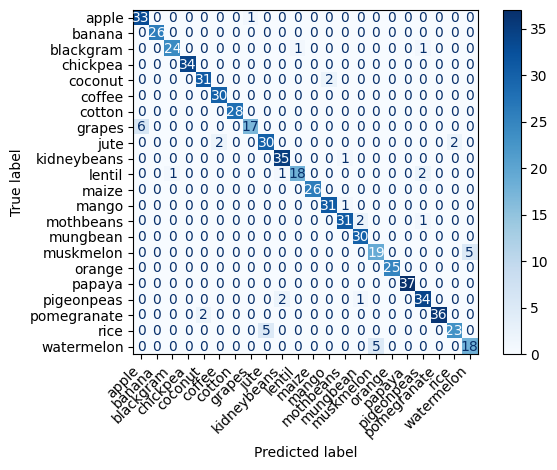

In [72]:
#Confusion matrix - to visualize which crops are being confused with each other 
plt.figure(figsize = (12,10))
disp = metrics.ConfusionMatrixDisplay.from_estimator(final_pipe, X_test, y_test, cmap="Blues")
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

<h3>8. (Additional) Predicting best crop for new soil data</h3>

In [73]:
new_data = pd.DataFrame({'N':[20],'P':[15],'K':[30],'ph':[6.8]})
predicted_crop = rf_pipe.predict(new_data)
print(f"Best crop to produce based on the soil components presented in the new data: {predicted_crop[0]}")

Best crop to produce based on the soil components presented in the new data: mango


<h3>9. (Additional) Performance Comparison: Logistic Regression vs Random Forest</h3>

In [74]:
#Evaluation of the data on logreg
pipeline = make_pipeline(scaler, LogisticRegression(solver = 'lbfgs', max_iter = 200, random_state = 42))
pipeline.fit(X_train,y_train)
y_pred_logreg = pipeline.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred_logreg)
score = metrics.f1_score(y_test, y_pred_logreg, average = 'weighted')
#print(f"f1-score with logistic regression: {score:.3f}")

#Comparison of the metrics of two models
compare_metrics['Logistic Regression'] = [acc, score]
df = pd.DataFrame(compare_metrics, index = ['Accuracy', 'f1-Score'])
print(df)

          Random Forest  Logistic Regression
Accuracy       0.800000             0.651515
f1-Score       0.798012             0.642588


<h3>9. Conclusion</h3>

- Logistic Regression achieved an F1-score of ~0.64, while on the same dataset Random Forest improved performance and scored ~0.79.
- Based on the soil features, the model can successfully suggest a suitable crop.